<a href="https://colab.research.google.com/github/damitkumar11/-Financial-Data-EDA-Data-Analytics-Python-/blob/main/%F0%9F%92%B0%F0%9F%92%B5Financial_Data%7CEDA%7CData_Analytics%7CPython%F0%9F%92%B2%F0%9F%92%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'financial-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4363947%2F7494625%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240128%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240128T144422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4129c76e9c56d6fd3f230fa1df5838d489fa39b1ee1a712482abb7507c6661397fc6c993396e69d7a116d34800ef7a86eb1888983250f0da6ade721c5b2971c07c3d53083683f91132564b903303ab686ec45568150c8878d8edb056f1d661d583421631640d4a55c3a10e4eb84c23c6c0d98ab215d490098b3157ac9516b7f3c022e405ee33c710bb38ef741cbd16276cadcdbde9e0e3c59f26bc1d49227c8589abbab015d3b06428f906bdf9670307cfabc25326db8a6c4c30698feaadf0dad97a726bbee868c918f98e24e05766c3df855ce126e1914c86cedc5beba6e5b32fc75f2efaea969e157443294d421774eec1923bff43f3ba009ad30aa2e5b70d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 29000 bytes downloaded
Downloaded and uncompressed: financial-data
Data source import complete.


In [2]:
import pandas as pd

# Importing the daily data
daily_data = pd.read_csv("/kaggle/input/financial-data/BBCA.JK new.csv")

# Importing the monthly data
monthly_data = pd.read_csv("/kaggle/input/financial-data/BBCA.JK_monthly new.csv")

# Importing the weekly data
weekly_data = pd.read_csv("/kaggle/input/financial-data/BBCA.JK_weekly  new.csv")

In [3]:
# Shape of daily data
daily_shape = daily_data.shape
print("Shape of daily data:", daily_shape)

# Shape of monthly data
monthly_shape = monthly_data.shape
print("Shape of monthly data:", monthly_shape)

# Shape of weekly data
weekly_shape = weekly_data.shape
print("Shape of weekly data:", weekly_shape)

Shape of daily data: (1251, 7)
Shape of monthly data: (62, 7)
Shape of weekly data: (266, 7)


In [4]:
# Column names of daily data
daily_columns = daily_data.columns
print("Columns of daily data:", daily_columns)

# Column names of monthly data
monthly_columns = monthly_data.columns
print("Columns of monthly data:", monthly_columns)

# Column names of weekly data
weekly_columns = weekly_data.columns
print("Columns of weekly data:", weekly_columns)

Columns of daily data: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Columns of monthly data: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Columns of weekly data: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
# First few rows of daily data
daily_head = daily_data.head()
print("First few rows of daily data:\n", daily_head)

# First few rows of monthly data
monthly_head = monthly_data.head()
print("First few rows of monthly data:\n", monthly_head)

# First few rows of weekly data
weekly_head = weekly_data.head()
print("First few rows of weekly data:\n", weekly_head)

First few rows of daily data:
          Date    Open    High     Low   Close            Adj Close    Volume
0  2019-01-01  5200.0  5200.0  5200.0  5200.0   47.365.439.453.125         0
1  2019-01-02  5200.0  5245.0  5200.0  5240.0  477.297.900.390.625  35956000
2  2019-01-03  5200.0  5220.0  5115.0  5180.0  471.832.666.015.625  72358000
3  2019-01-04  5175.0  5205.0  5125.0  5205.0      474.109.765.625  51465000
4  2019-01-07  5265.0  5325.0  5245.0  5245.0    4.777.533.203.125  73438000
First few rows of monthly data:
          Date    Open    High     Low   Close            Adj Close      Volume
0  2018-12-31  5200.0  5640.0  5115.0  5635.0  513.277.392.578.125  1859122000
1  2019-01-31  5680.0  5750.0  5335.0  5515.0  502.346.923.828.125  1493339500
2  2019-02-28  5565.0  5600.0  5425.0  5510.0       50.189.140.625   790477000
3  2019-03-31  5550.0  5805.0  5450.0  5750.0  523.752.392.578.125   989206000
4  2019-04-30  5750.0  5895.0  5140.0  5820.0      534.974.609.375  1700900500


In [6]:
# Data types of columns in daily data
daily_datatypes = daily_data.dtypes
print("Data types of columns in daily data:\n", daily_datatypes)

# Data types of columns in monthly data
monthly_datatypes = monthly_data.dtypes
print("Data types of columns in monthly data:\n", monthly_datatypes)

# Data types of columns in weekly data
weekly_datatypes = weekly_data.dtypes
print("Data types of columns in weekly data:\n", weekly_datatypes)

Data types of columns in daily data:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close     object
Volume         int64
dtype: object
Data types of columns in monthly data:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close     object
Volume         int64
dtype: object
Data types of columns in weekly data:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close     object
Volume         int64
dtype: object


In [7]:
# Summary statistics of daily data
daily_summary = daily_data.describe()
print("Summary statistics of daily data:\n", daily_summary)

# Summary statistics of monthly data
monthly_summary = monthly_data.describe()
print("Summary statistics of monthly data:\n", monthly_summary)

# Summary statistics of weekly data
weekly_summary = weekly_data.describe()
print("Summary statistics of weekly data:\n", weekly_summary)

Summary statistics of daily data:
               Open         High          Low        Close        Volume
count  1251.000000  1251.000000  1251.000000  1251.000000  1.251000e+03
mean   7126.394884  7188.697042  7061.678657  7124.980016  8.336287e+07
std    1282.957191  1286.559498  1285.692599  1287.519607  5.409189e+07
min    4450.000000  4800.000000  4325.000000  4430.000000  0.000000e+00
25%    6070.000000  6110.000000  6010.000000  6057.500000  5.349915e+07
50%    6800.000000  6855.000000  6730.000000  6790.000000  7.196610e+07
75%    8337.500000  8450.000000  8275.000000  8350.000000  9.827880e+07
max    9775.000000  9775.000000  9675.000000  9750.000000  7.228279e+08
Summary statistics of monthly data:
               Open         High          Low        Close        Volume
count    62.000000    62.000000    62.000000    62.000000  6.200000e+01
mean   7152.903226  7500.241935  6866.048387  7204.032258  1.683321e+09
std    1336.251040  1322.701975  1362.125610  1337.754676  5.524

**Bar plot of the number of observations per month in the daily dataset**

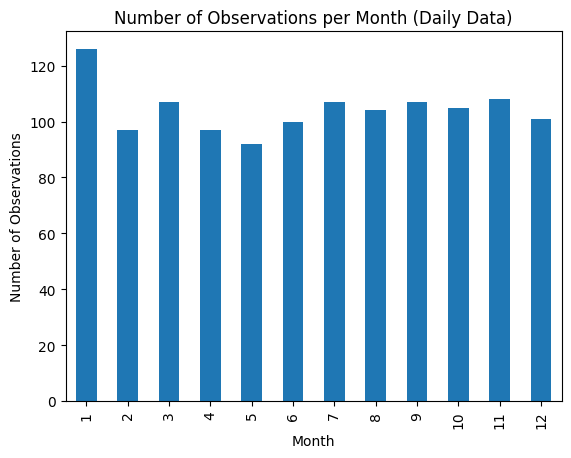

In [8]:
import matplotlib.pyplot as plt

# Convert Date column to datetime format
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Extract month from Date column
daily_data['Month'] = daily_data['Date'].dt.month

# Count number of observations per month
monthly_count = daily_data.groupby('Month').size()

# Plotting bar plot
monthly_count.plot(kind='bar', xlabel='Month', ylabel='Number of Observations', title='Number of Observations per Month (Daily Data)')
plt.show()

**Bar plot of the number of observations per year in the monthly dataset**

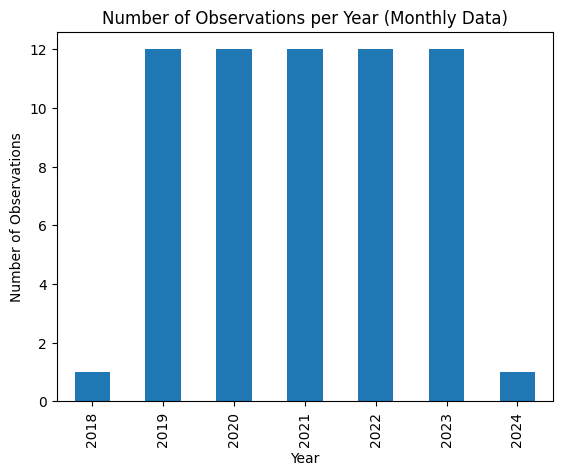

In [9]:
# Convert Date column to datetime format
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Extract year from Date column
monthly_data['Year'] = monthly_data['Date'].dt.year

# Count number of observations per year
yearly_count = monthly_data.groupby('Year').size()

# Plotting bar plot
yearly_count.plot(kind='bar', xlabel='Year', ylabel='Number of Observations', title='Number of Observations per Year (Monthly Data)')
plt.show()

**Bar plot of the number of observations per week in the weekly dataset**

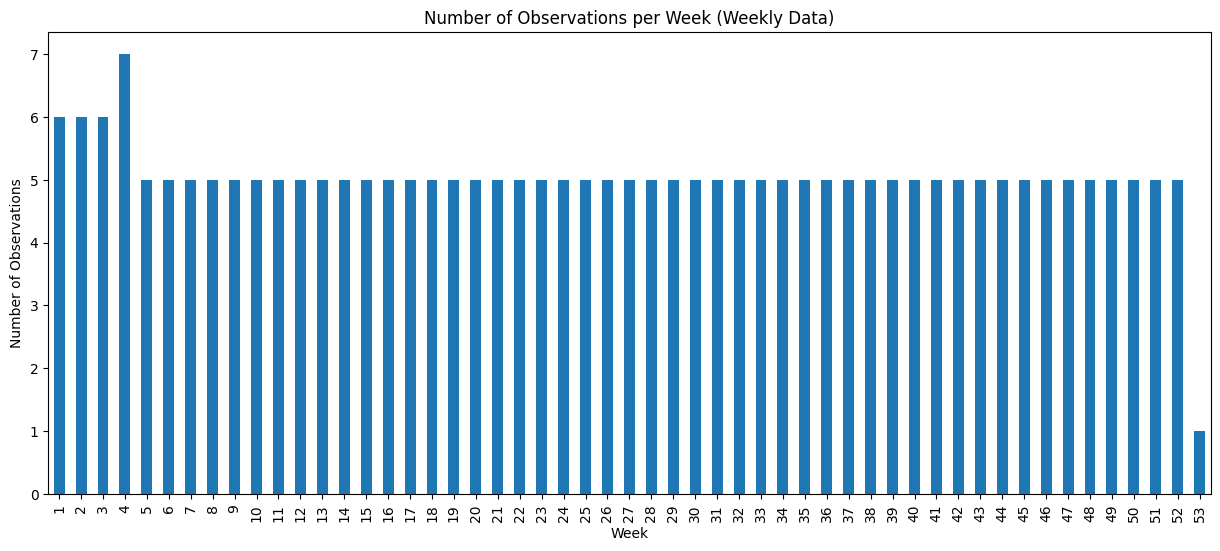

In [10]:
# Convert Date column to datetime format
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])

# Extract week number from Date column
weekly_data['Week'] = weekly_data['Date'].dt.isocalendar().week

# Count number of observations per week
weekly_count = weekly_data.groupby('Week').size()
plt.figure(figsize=(15, 6))
# Plotting bar plot
weekly_count.plot(kind='bar', xlabel='Week', ylabel='Number of Observations', title='Number of Observations per Week (Weekly Data)')
plt.show()

**Bar plot of average closing prices per month in the daily dataset**

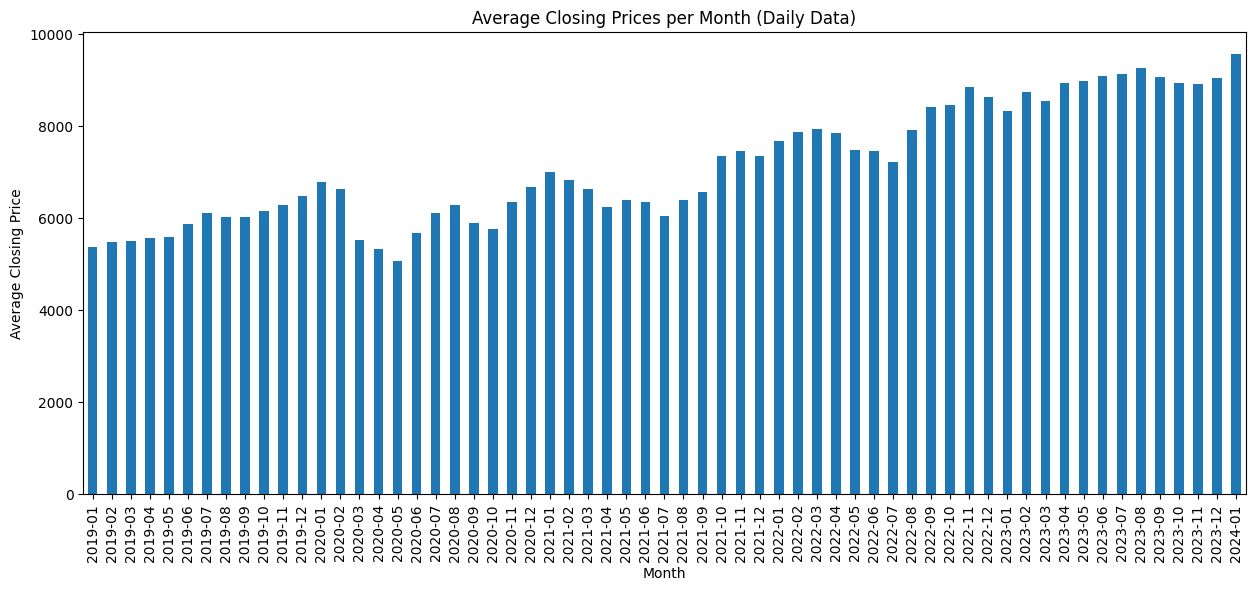

In [11]:
# Calculate average closing price per month
monthly_avg_close = daily_data.groupby(daily_data['Date'].dt.to_period('M'))['Close'].mean()
plt.figure(figsize=(15, 6))
# Plotting bar plot
monthly_avg_close.plot(kind='bar', xlabel='Month', ylabel='Average Closing Price', title='Average Closing Prices per Month (Daily Data)')
plt.show()

**Bar plot of average closing prices per year in the monthly dataset**

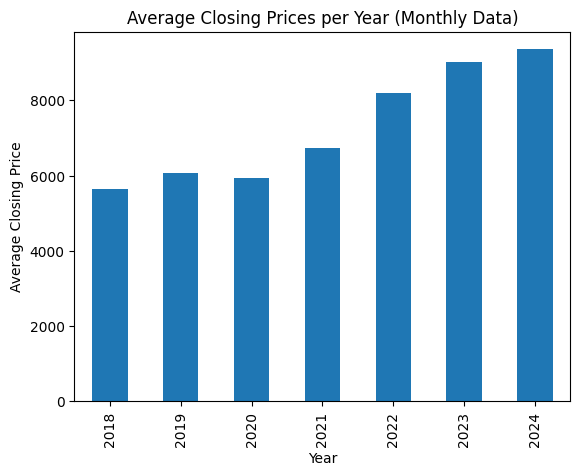

In [12]:
# Calculate average closing price per year
yearly_avg_close = monthly_data.groupby(monthly_data['Date'].dt.year)['Close'].mean()

# Plotting bar plot
yearly_avg_close.plot(kind='bar', xlabel='Year', ylabel='Average Closing Price', title='Average Closing Prices per Year (Monthly Data)')
plt.show()

**Bar plot of average closing prices per week in the weekly dataset**

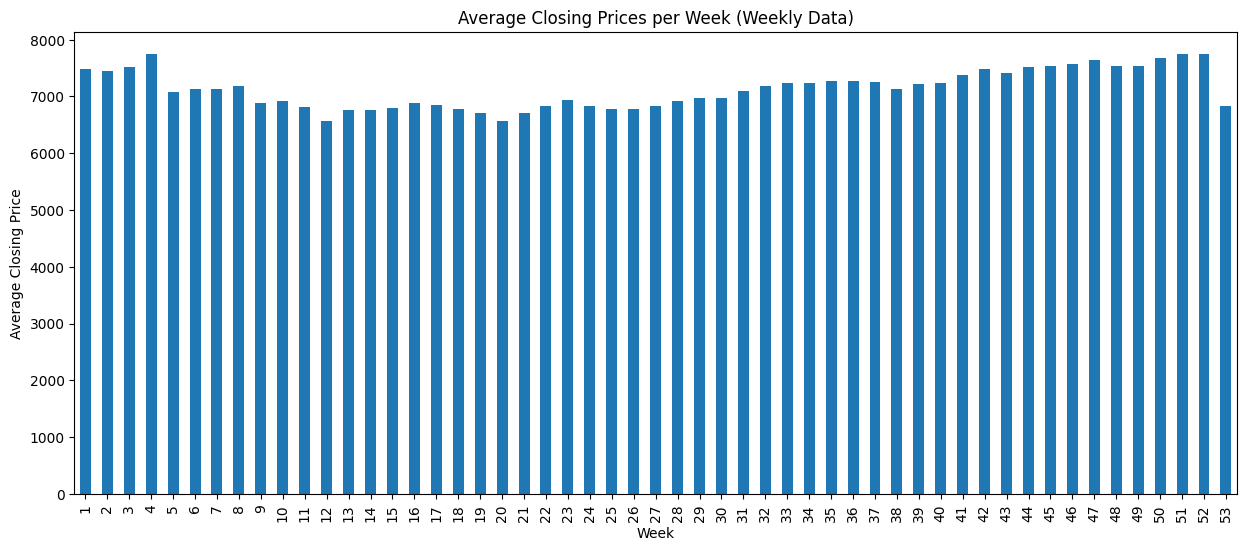

In [13]:
# Calculate average closing price per week
weekly_avg_close = weekly_data.groupby(weekly_data['Date'].dt.isocalendar().week)['Close'].mean()
plt.figure(figsize=(15, 6))
# Plotting bar plot
weekly_avg_close.plot(kind='bar', xlabel='Week', ylabel='Average Closing Price', title='Average Closing Prices per Week (Weekly Data)')
plt.show()

**Bar plot of average volume per year in the monthly dataset**

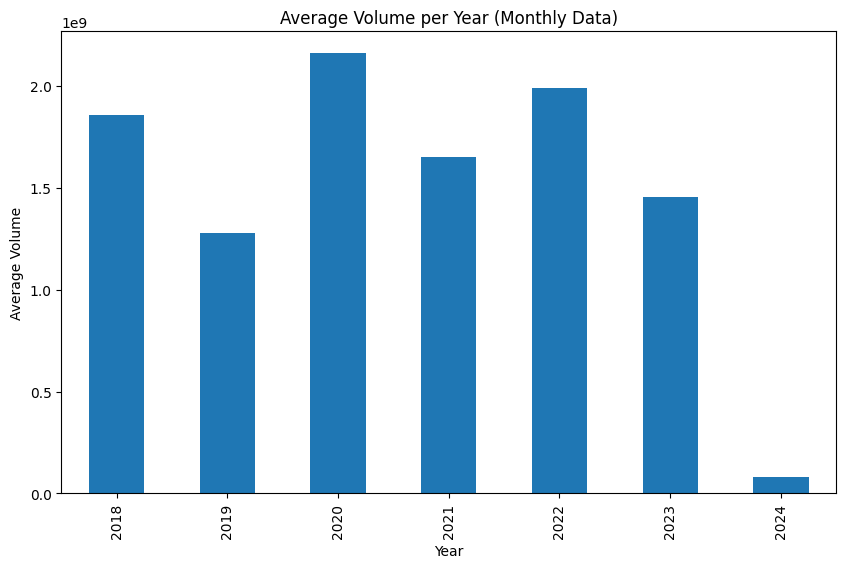

In [14]:
# Calculate average volume per year
yearly_avg_volume = monthly_data.groupby(monthly_data['Date'].dt.year)['Volume'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
yearly_avg_volume.plot(kind='bar', xlabel='Year', ylabel='Average Volume', title='Average Volume per Year (Monthly Data)')
plt.show()

**Bar plot of average volume per week in the weekly dataset**

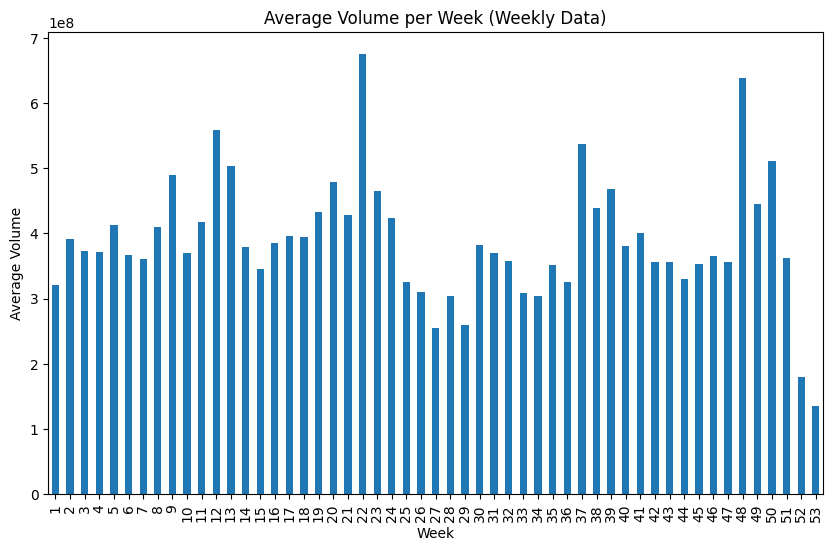

In [15]:
# Calculate average volume per week
weekly_avg_volume = weekly_data.groupby(weekly_data['Date'].dt.isocalendar().week)['Volume'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
weekly_avg_volume.plot(kind='bar', xlabel='Week', ylabel='Average Volume', title='Average Volume per Week (Weekly Data)')
plt.show()

**Bar plot of the distribution of closing prices in the daily dataset**

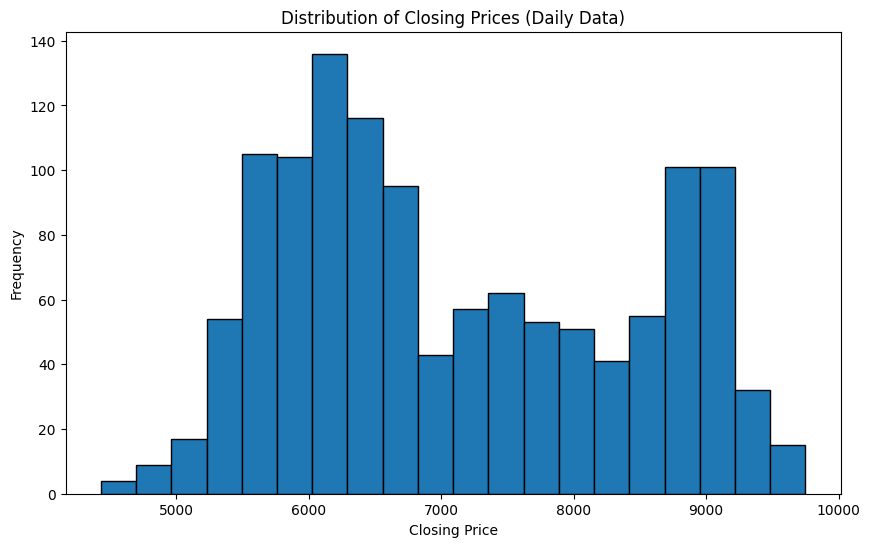

In [16]:
# Plotting histogram for distribution of closing prices
plt.figure(figsize=(10, 6))
daily_data['Close'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices (Daily Data)')
plt.show()

**Bar plot of the distribution of closing prices in the monthly dataset**

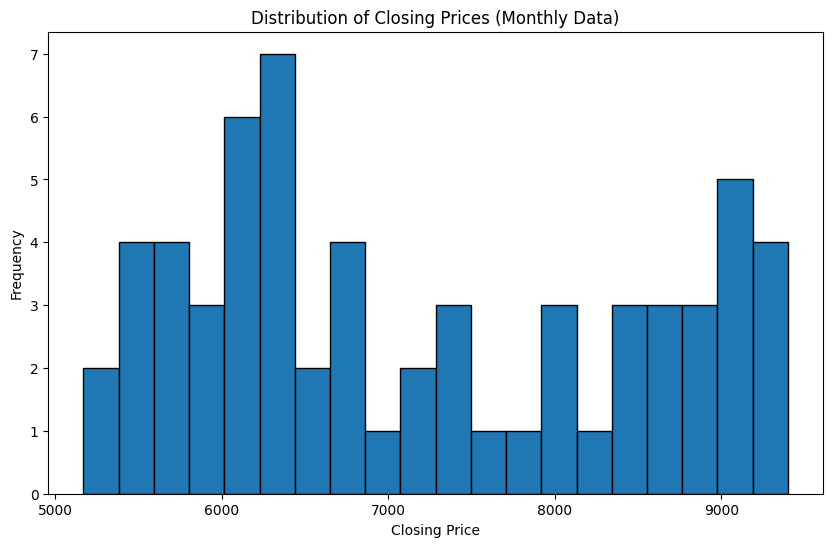

In [17]:
# Plotting histogram for distribution of closing prices
plt.figure(figsize=(10, 6))
monthly_data['Close'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices (Monthly Data)')
plt.show()

**Bar plot of the distribution of closing prices in the weekly dataset**

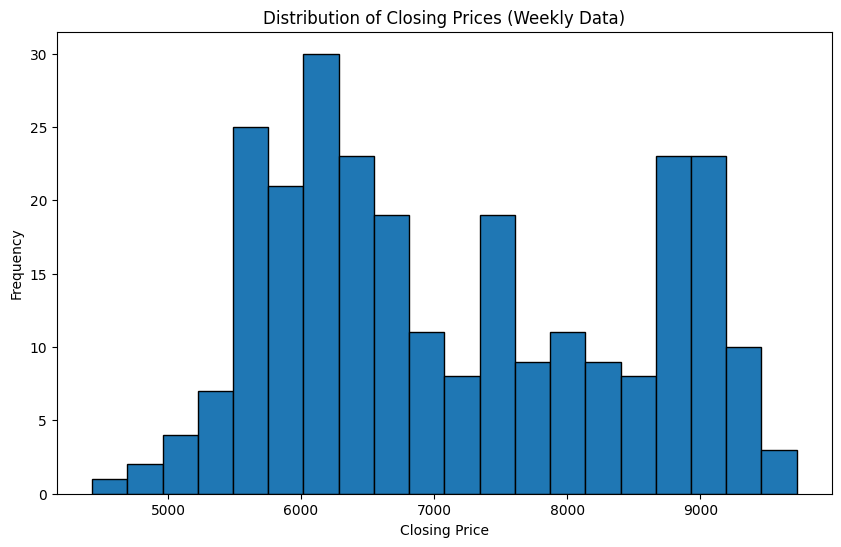

In [18]:
# Plotting histogram for distribution of closing prices
plt.figure(figsize=(10, 6))
weekly_data['Close'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices (Weekly Data)')
plt.show()


**Bar plot of the distribution of trading volume in the daily dataset**

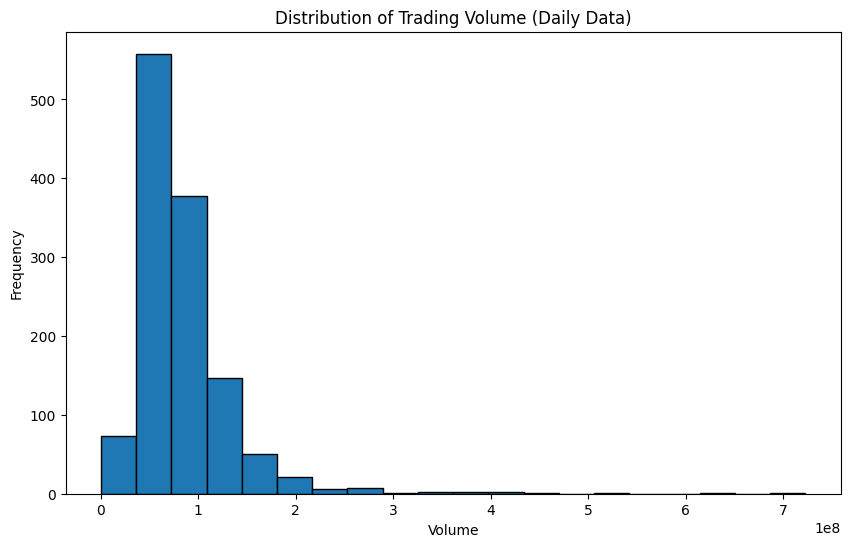

In [19]:
# Plotting histogram for distribution of trading volume
plt.figure(figsize=(10, 6))
daily_data['Volume'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume (Daily Data)')
plt.show()

**Bar plot of the distribution of trading volume in the monthly dataset**

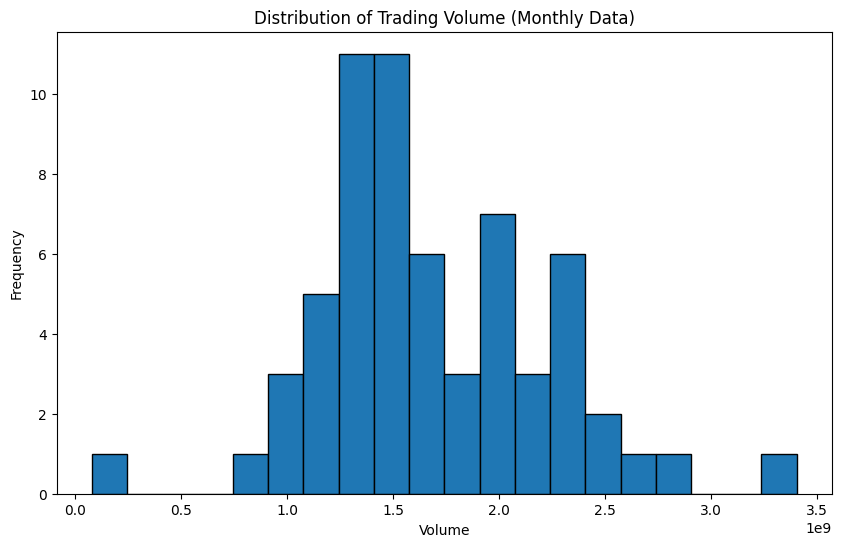

In [20]:
# Plotting histogram for distribution of trading volume
plt.figure(figsize=(10, 6))
monthly_data['Volume'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume (Monthly Data)')
plt.show()

**Bar plot of the distribution of trading volume in the weekly dataset**

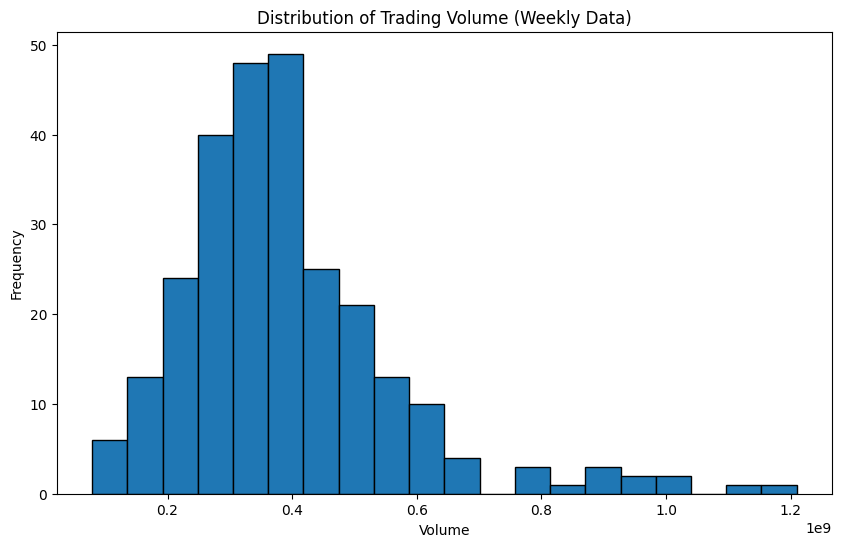

In [21]:
# Plotting histogram for distribution of trading volume
plt.figure(figsize=(10, 6))
weekly_data['Volume'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume (Weekly Data)')
plt.show()

**Bar plot of the average daily trading volume per month in the daily dataset**

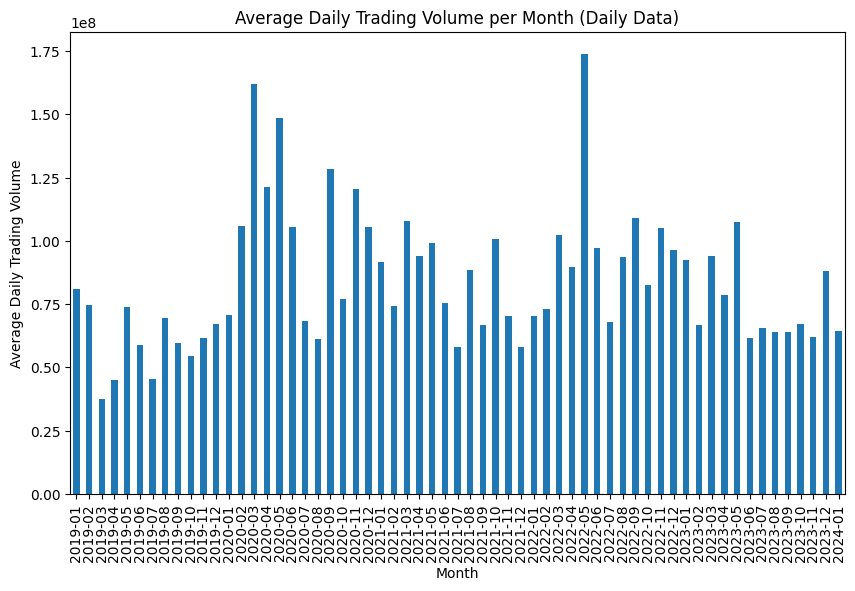

In [22]:
# Calculate average daily trading volume per month
monthly_avg_daily_volume = daily_data.groupby(daily_data['Date'].dt.to_period('M'))['Volume'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
monthly_avg_daily_volume.plot(kind='bar', xlabel='Month', ylabel='Average Daily Trading Volume', title='Average Daily Trading Volume per Month (Daily Data)')
plt.show()

**Bar plot of the average monthly trading volume per year in the monthly dataset**

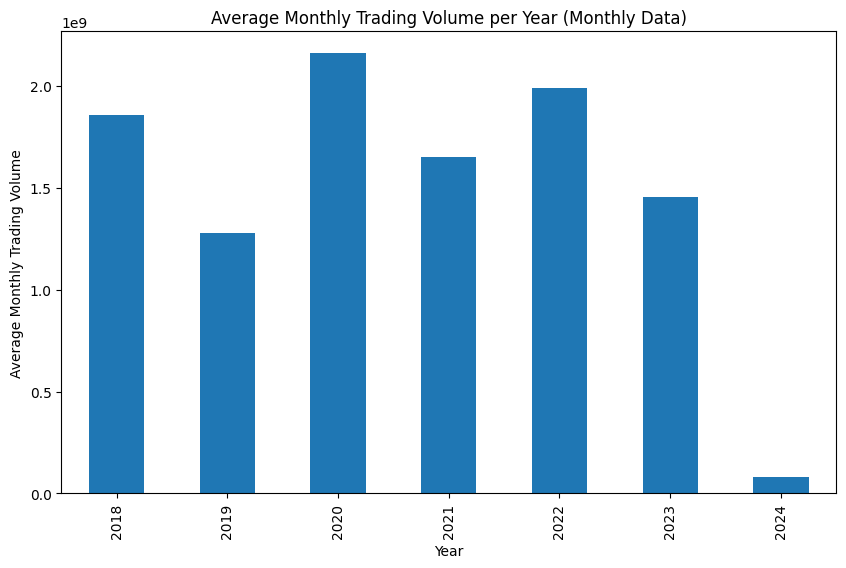

In [23]:
# Calculate average monthly trading volume per year
yearly_avg_monthly_volume = monthly_data.groupby(monthly_data['Date'].dt.year)['Volume'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
yearly_avg_monthly_volume.plot(kind='bar', xlabel='Year', ylabel='Average Monthly Trading Volume', title='Average Monthly Trading Volume per Year (Monthly Data)')
plt.show()

**Bar plot of the average weekly trading volume per week in the weekly dataset**

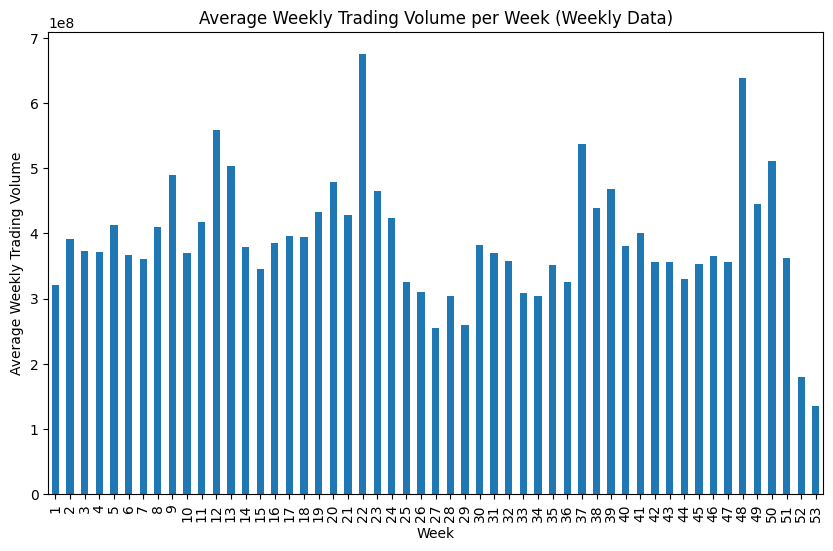

In [24]:
# Calculate average weekly trading volume per week
weekly_avg_weekly_volume = weekly_data.groupby(weekly_data['Date'].dt.isocalendar().week)['Volume'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
weekly_avg_weekly_volume.plot(kind='bar', xlabel='Week', ylabel='Average Weekly Trading Volume', title='Average Weekly Trading Volume per Week (Weekly Data)')
plt.show()

**Bar plot of the average closing price per day of the week in the daily dataset**

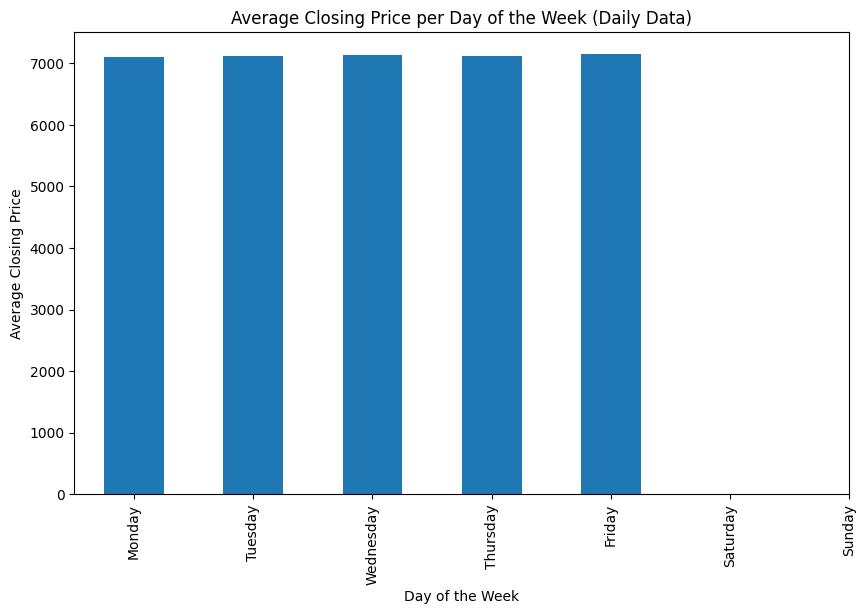

In [25]:
# Extract day of the week from Date column (0=Monday, 6=Sunday)
daily_data['Day_of_Week'] = daily_data['Date'].dt.dayofweek

# Calculate average closing price per day of the week
avg_close_per_day = daily_data.groupby('Day_of_Week')['Close'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
avg_close_per_day.plot(kind='bar', xlabel='Day of the Week', ylabel='Average Closing Price', title='Average Closing Price per Day of the Week (Daily Data)')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

**Bar plot of the average closing price per quarter in the monthly dataset**

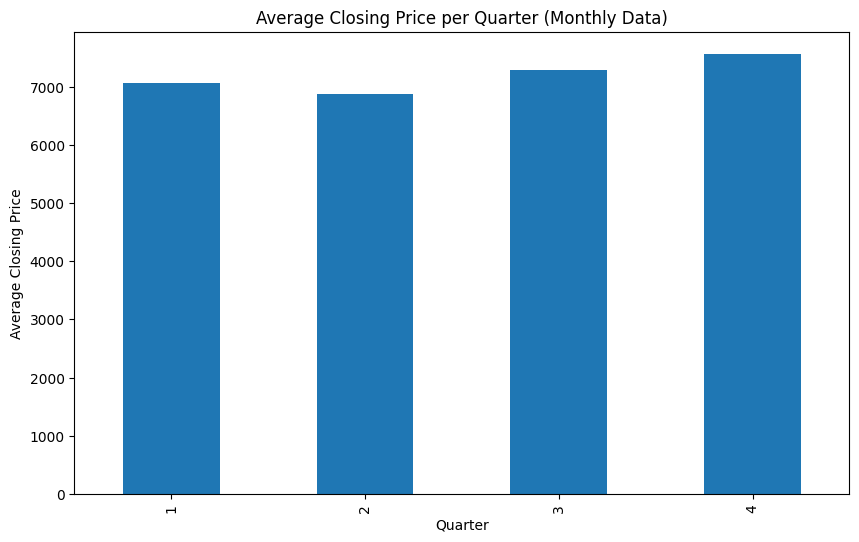

In [26]:
# Extract quarter from Date column
monthly_data['Quarter'] = monthly_data['Date'].dt.quarter

# Calculate average closing price per quarter
avg_close_per_quarter = monthly_data.groupby('Quarter')['Close'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
avg_close_per_quarter.plot(kind='bar', xlabel='Quarter', ylabel='Average Closing Price', title='Average Closing Price per Quarter (Monthly Data)')
plt.show()

**Bar plot of the average closing price per month in the weekly dataset**

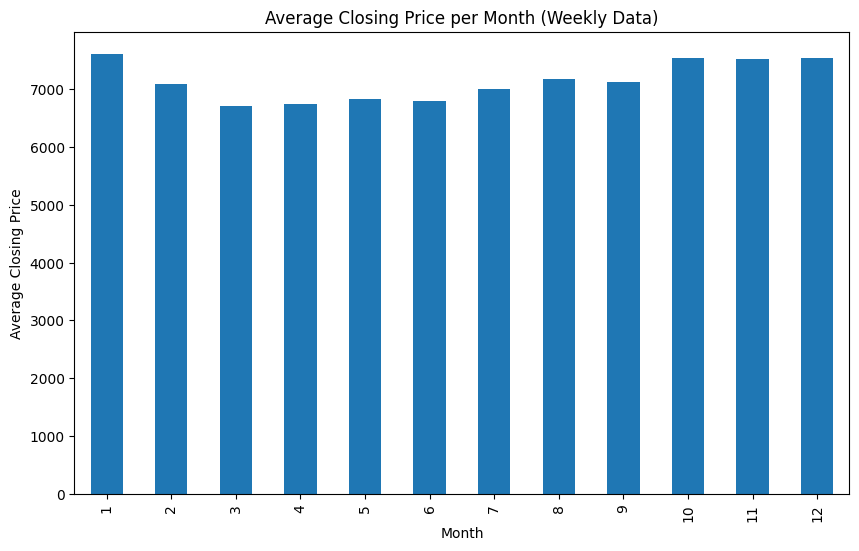

In [27]:
# Extract month from Date column
weekly_data['Month'] = weekly_data['Date'].dt.month

# Calculate average closing price per month
avg_close_per_month = weekly_data.groupby('Month')['Close'].mean()

# Plotting bar plot
plt.figure(figsize=(10, 6))
avg_close_per_month.plot(kind='bar', xlabel='Month', ylabel='Average Closing Price', title='Average Closing Price per Month (Weekly Data)')
plt.show()